# Soccer Prediction - Exploratory Data Analysis

### [European Soccer Database](https://www.kaggle.com/hugomathien/soccer)
25k+ matches, players & teams attributes for European Professional Football

![DB Diagram](../reports/figures/database_diagram.png)


## 1 - Access Data

In [1]:
import sqlite3
import pandas as pd

# Create a SQL connection to our SQLite database
con = sqlite3.connect("../data/raw/database.sqlite")

# Queries Existing Tables
match_df = pd.read_sql_query("SELECT * FROM Match", con)
country_df = pd.read_sql_query("SELECT * FROM Country", con)
league_df = pd.read_sql_query("SELECT * FROM League", con)
team_df = pd.read_sql_query("SELECT * FROM Team_Attributes", con)

# closes database connection
con.close()

## 2 - Explore Data

In [23]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [24]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [25]:
match_df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


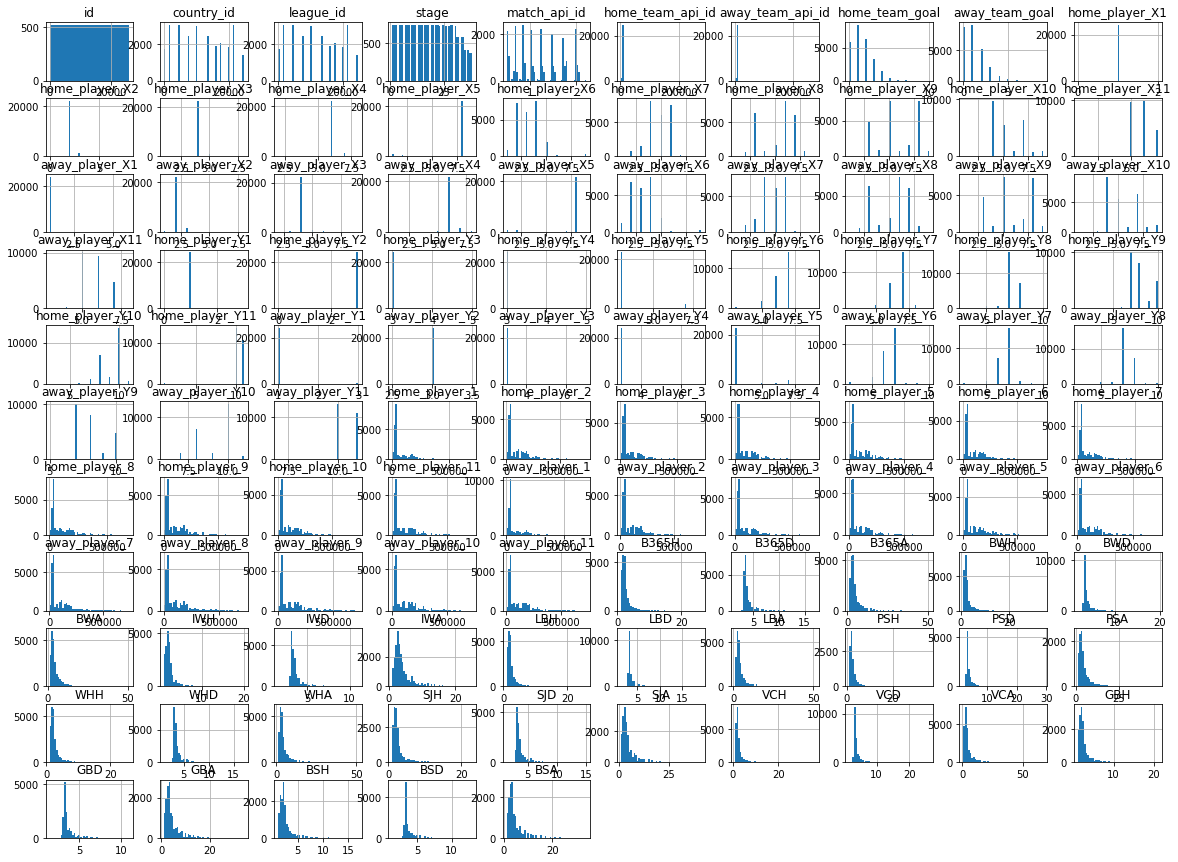

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

match_df.hist(bins=50, figsize=(20,15))

plt.show()

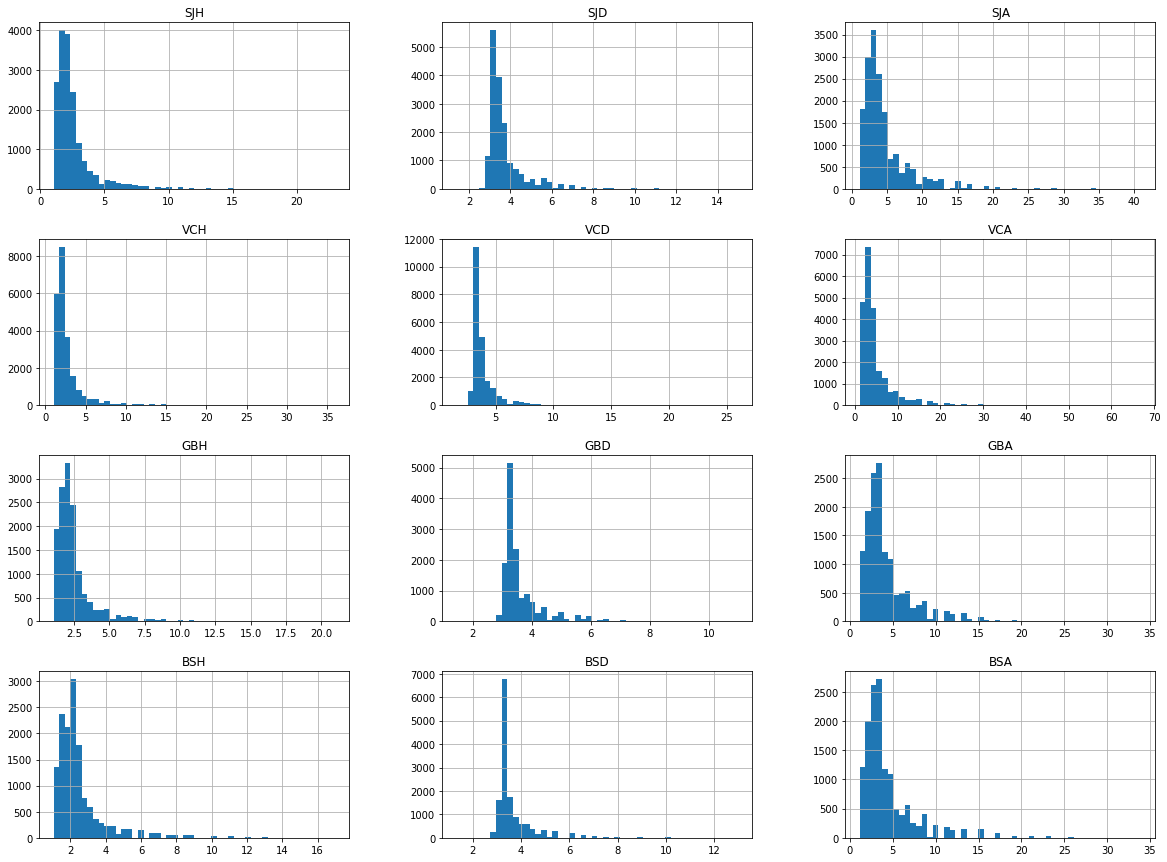

In [32]:
# BETTING ODDS - DRAWS ARE THE LEAST PROBABLE
match_df[["SJH", "SJD", "SJA", "VCH", "VCD", "VCA", "GBH", "GBD", "GBA", "BSH", "BSD", "BSA"]].hist(bins=50, figsize=(20,15))

plt.show()

# match_df['VCH'].hist(alpha = 0.5)
# match_df['VCD'].hist(alpha = 0.5)
# match_df['VCA'].hist(alpha = 0.5)

<AxesSubplot:>

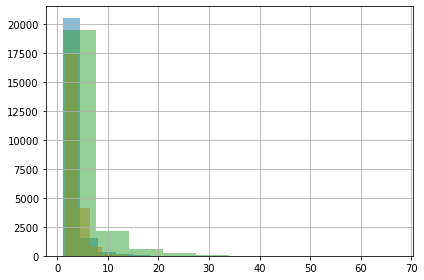

In [37]:
plt.rcParams["figure.autolayout"] = True


match_df['VCH'].hist(alpha = 0.5)
match_df['VCD'].hist(alpha = 0.5)
match_df['VCA'].hist(alpha = 0.5)

## 3 - Feature Engineering

In [3]:
# obtain year feature in order to merge
match_df['year'] = pd.DatetimeIndex(match_df['date']).year
df=match_df[['id','country_id','league_id','stage','home_team_api_id','away_team_api_id',
             'home_team_goal','away_team_goal','year']]
team_df['year'] = pd.DatetimeIndex(team_df['date']).year

In [4]:
match_df.shape

(25979, 116)

In [5]:
# MERGE SCORE OF HOME_TEAM TO DF
df=df.merge(team_df[["team_api_id","buildUpPlaySpeed","buildUpPlayDribbling","buildUpPlayPassing",
                    "buildUpPlayPositioningClass", "chanceCreationPassing", "chanceCreationCrossing",
                    "chanceCreationShooting","chanceCreationPositioningClass", "defencePressure",
                    "defenceAggression","defenceTeamWidth", "defenceDefenderLineClass","year"]],
            left_on=["home_team_api_id", "year"], right_on=["team_api_id","year"], how="inner")

In [6]:
# CHANGE FEATURES TEAM TO HOME_TEAM
df.rename(columns={"buildUpPlaySpeed":"buildUpPlaySpeed_home",
                   "buildUpPlayDribbling":"buildUpPlayDribbling_home",
                   "buildUpPlayPassing":"buildUpPlayPassing_home", 
                   "buildUpPlayPositioningClass":"buildUpPlayPositioningClass_home",
                   "chanceCreationPassing":"chanceCreationPassing_home",
                   "chanceCreationCrossing":"chanceCreationCrossing_home",
                   "chanceCreationShooting":"chanceCreationShooting_home", 
                   "chanceCreationPositioningClass":"chanceCreationPositioningClass_home", 
                   "defencePressure":"defencePressure_home", 
                   "defenceAggression":"defenceAggression_home", 
                   "defenceTeamWidth":"defenceTeamWidth_home", 
                   "defenceDefenderLineClass":"defenceDefenderLineClass_home", 
                   }, inplace=True)

In [7]:
# MERGE SCORE OF AWAY_TEAM
df=df.merge(team_df[["team_api_id","buildUpPlaySpeed","buildUpPlayDribbling","buildUpPlayPassing",
                    "buildUpPlayPositioningClass", "chanceCreationPassing", "chanceCreationCrossing",
                    "chanceCreationShooting","chanceCreationPositioningClass", "defencePressure",
                    "defenceAggression","defenceTeamWidth", "defenceDefenderLineClass","year"]],
            left_on=["away_team_api_id", "year"], right_on=["team_api_id","year"], how="inner")

In [8]:
# CHANGE FEATURES TEAM TO HOME_TEAM
df.rename(columns={"buildUpPlaySpeed":"buildUpPlaySpeed_away",
                   "buildUpPlayDribbling":"buildUpPlayDribbling_away",
                   "buildUpPlayPassing":"buildUpPlayPassing_away", 
                   "buildUpPlayPositioningClass":"buildUpPlayPositioningClass_away",
                   "chanceCreationPassing":"chanceCreationPassing_away",
                   "chanceCreationCrossing":"chanceCreationCrossing_away",
                   "chanceCreationShooting":"chanceCreationShooting_away", 
                   "chanceCreationPositioningClass":"chanceCreationPositioningClass_away", 
                   "defencePressure":"defencePressure_away", 
                   "defenceAggression":"defenceAggression_away", 
                   "defenceTeamWidth":"defenceTeamWidth_away", 
                   "defenceDefenderLineClass":"defenceDefenderLineClass_away", 
                   }, inplace=True)

In [9]:
df.columns

Index(['id', 'country_id', 'league_id', 'stage', 'home_team_api_id',
       'away_team_api_id', 'home_team_goal', 'away_team_goal', 'year',
       'team_api_id_x', 'buildUpPlaySpeed_home', 'buildUpPlayDribbling_home',
       'buildUpPlayPassing_home', 'buildUpPlayPositioningClass_home',
       'chanceCreationPassing_home', 'chanceCreationCrossing_home',
       'chanceCreationShooting_home', 'chanceCreationPositioningClass_home',
       'defencePressure_home', 'defenceAggression_home',
       'defenceTeamWidth_home', 'defenceDefenderLineClass_home',
       'team_api_id_y', 'buildUpPlaySpeed_away', 'buildUpPlayDribbling_away',
       'buildUpPlayPassing_away', 'buildUpPlayPositioningClass_away',
       'chanceCreationPassing_away', 'chanceCreationCrossing_away',
       'chanceCreationShooting_away', 'chanceCreationPositioningClass_away',
       'defencePressure_away', 'defenceAggression_away',
       'defenceTeamWidth_away', 'defenceDefenderLineClass_away'],
      dtype='object')

In [10]:
# CALCULATE THE TARGET FUNCTION
# FIRST: PRECTING HOME_WIN, TIE, AWAY WIN
def result_game(home_goals, away_goals):
    
    dif_goals=home_goals-away_goals
    
    if dif_goals==0:
        target="TIE"
    elif dif_goals>0:
        target="HOME_WIN"
    else:
        target="AWAY_WIN"
    return target  

In [11]:
df['result']=df.apply(lambda row:result_game(row['home_team_goal'],row['away_team_goal']), axis=1)

In [12]:
df.isnull().sum()

id                                         0
country_id                                 0
league_id                                  0
stage                                      0
home_team_api_id                           0
away_team_api_id                           0
home_team_goal                             0
away_team_goal                             0
year                                       0
team_api_id_x                              0
buildUpPlaySpeed_home                      0
buildUpPlayDribbling_home              12166
buildUpPlayPassing_home                    0
buildUpPlayPositioningClass_home           0
chanceCreationPassing_home                 0
chanceCreationCrossing_home                0
chanceCreationShooting_home                0
chanceCreationPositioningClass_home        0
defencePressure_home                       0
defenceAggression_home                     0
defenceTeamWidth_home                      0
defenceDefenderLineClass_home              0
team_api_i

In [13]:
# REMOVE THE REPEATED FEATURES AND FEATURES WITH HIGHER NUMBER OF MISSING VALUES
df=df.drop(['home_team_goal','away_team_goal','team_api_id_x','team_api_id_y',
         'buildUpPlayDribbling_home','buildUpPlayDribbling_away'],axis=1)

In [14]:
df.dtypes

id                                      int64
country_id                              int64
league_id                               int64
stage                                   int64
home_team_api_id                        int64
away_team_api_id                        int64
year                                    int64
buildUpPlaySpeed_home                   int64
buildUpPlayPassing_home                 int64
buildUpPlayPositioningClass_home       object
chanceCreationPassing_home              int64
chanceCreationCrossing_home             int64
chanceCreationShooting_home             int64
chanceCreationPositioningClass_home    object
defencePressure_home                    int64
defenceAggression_home                  int64
defenceTeamWidth_home                   int64
defenceDefenderLineClass_home          object
buildUpPlaySpeed_away                   int64
buildUpPlayPassing_away                 int64
buildUpPlayPositioningClass_away       object
chanceCreationPassing_away        

In [15]:
# CONVERT CATEGORICAL VARIABLES TO ONE HOT 
df_categorical = pd.get_dummies(df, columns = ['buildUpPlayPositioningClass_home', 'chanceCreationPositioningClass_home',
                                                'defenceDefenderLineClass_home','buildUpPlayPositioningClass_away',
                                                'chanceCreationPositioningClass_away','defenceDefenderLineClass_away'])

In [16]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_categorical["result_code"] = lb_make.fit_transform(df_categorical["result"])

In [17]:
df_categorical.head()

,id,country_id,league_id,stage,home_team_api_id,away_team_api_id,year,buildUpPlaySpeed_home,buildUpPlayPassing_home,chanceCreationPassing_home,...,chanceCreationPositioningClass_home_Organised,defenceDefenderLineClass_home_Cover,defenceDefenderLineClass_home_Offside Trap,buildUpPlayPositioningClass_away_Free Form,buildUpPlayPositioningClass_away_Organised,chanceCreationPositioningClass_away_Free Form,chanceCreationPositioningClass_away_Organised,defenceDefenderLineClass_away_Cover,defenceDefenderLineClass_away_Offside Trap,result_code
0,377,1,1,19,8635,8342,2010,50,35,70,...,1,1,0,0,1,0,1,1,0,1
1,557,1,1,14,8635,8342,2010,50,35,70,...,1,1,0,0,1,0,1,1,0,2
2,736,1,1,7,9986,8342,2010,40,50,45,...,1,1,0,0,1,0,1,1,0,0
3,602,1,1,19,8203,8342,2010,65,60,50,...,1,1,0,0,1,0,1,1,0,0
4,447,1,1,28,9997,8342,2010,50,50,50,...,1,1,0,0,1,0,1,1,0,2


In [18]:
from sklearn.model_selection import train_test_split
# CREATE FEATURES AND TARGET

X = df_categorical.drop(['result_code','result'], axis=1)
y = df_categorical['result_code']

# Split train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [20]:
# RANDOM FOREST
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='accuracy', verbose=10)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 1/5; 1/27] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.476 total time=   0.5s
[CV 2/5; 1/27] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 2/5; 1/27] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.474 total time=   0.5s
[CV 3/5; 1/27] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 3/5; 1/27] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.479 total time=   0.5s
[CV 4/5; 1/27] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 4/5; 1/27] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.468 total time=   0.4s
[CV 5/5; 1/27] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 5/5; 1/27] END criterion=gini, max_d

[CV 1/5; 9/27] END criterion=gini, max_depth=4, max_features=log2, n_estimators=500;, score=0.476 total time=   3.7s
[CV 2/5; 9/27] START criterion=gini, max_depth=4, max_features=log2, n_estimators=500
[CV 2/5; 9/27] END criterion=gini, max_depth=4, max_features=log2, n_estimators=500;, score=0.474 total time=   3.6s
[CV 3/5; 9/27] START criterion=gini, max_depth=4, max_features=log2, n_estimators=500
[CV 3/5; 9/27] END criterion=gini, max_depth=4, max_features=log2, n_estimators=500;, score=0.482 total time=   3.4s
[CV 4/5; 9/27] START criterion=gini, max_depth=4, max_features=log2, n_estimators=500
[CV 4/5; 9/27] END criterion=gini, max_depth=4, max_features=log2, n_estimators=500;, score=0.465 total time=   3.5s
[CV 5/5; 9/27] START criterion=gini, max_depth=4, max_features=log2, n_estimators=500
[CV 5/5; 9/27] END criterion=gini, max_depth=4, max_features=log2, n_estimators=500;, score=0.472 total time=   2.9s
[CV 1/5; 10/27] START criterion=gini, max_depth=6, max_features=auto, n

[CV 2/5; 17/27] END criterion=gini, max_depth=6, max_features=log2, n_estimators=200;, score=0.480 total time=   3.5s
[CV 3/5; 17/27] START criterion=gini, max_depth=6, max_features=log2, n_estimators=200
[CV 3/5; 17/27] END criterion=gini, max_depth=6, max_features=log2, n_estimators=200;, score=0.484 total time=   2.3s
[CV 4/5; 17/27] START criterion=gini, max_depth=6, max_features=log2, n_estimators=200
[CV 4/5; 17/27] END criterion=gini, max_depth=6, max_features=log2, n_estimators=200;, score=0.469 total time=   1.8s
[CV 5/5; 17/27] START criterion=gini, max_depth=6, max_features=log2, n_estimators=200
[CV 5/5; 17/27] END criterion=gini, max_depth=6, max_features=log2, n_estimators=200;, score=0.478 total time=   1.6s
[CV 1/5; 18/27] START criterion=gini, max_depth=6, max_features=log2, n_estimators=500
[CV 1/5; 18/27] END criterion=gini, max_depth=6, max_features=log2, n_estimators=500;, score=0.484 total time=   4.1s
[CV 2/5; 18/27] START criterion=gini, max_depth=6, max_feature

[CV 2/5; 25/27] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100;, score=0.483 total time=   0.9s
[CV 3/5; 25/27] START criterion=gini, max_depth=8, max_features=log2, n_estimators=100
[CV 3/5; 25/27] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100;, score=0.486 total time=   0.9s
[CV 4/5; 25/27] START criterion=gini, max_depth=8, max_features=log2, n_estimators=100
[CV 4/5; 25/27] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100;, score=0.468 total time=   0.9s
[CV 5/5; 25/27] START criterion=gini, max_depth=8, max_features=log2, n_estimators=100
[CV 5/5; 25/27] END criterion=gini, max_depth=8, max_features=log2, n_estimators=100;, score=0.483 total time=   0.9s
[CV 1/5; 26/27] START criterion=gini, max_depth=8, max_features=log2, n_estimators=200
[CV 1/5; 26/27] END criterion=gini, max_depth=8, max_features=log2, n_estimators=200;, score=0.489 total time=   2.0s
[CV 2/5; 26/27] START criterion=gini, max_depth=8, max_feature

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
# SVM 

from sklearn.svm import SVC  
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_estimator_)